![](./assets/area.png)

![](./assets/header.png)

<span style="float: right; font-size: 20px; font-weight: bolder;">Projeto Final</span> 

**Professores:**
- Dr. Gilberto Queiroz
- Dr. Rafael Santos

**Discente:**
- Adriano Almeida

## Índice
- [1. Introdução](#Introdução)
    - [1.1 Dados](#dados)
- [2. Refêrencias](#Referências)

## 1. Introdução

<hr>
Este trabalho tem como objetivo apresentar uma análise de dados de radares meteorológicos, afim de realizar a previsão de descargas elétricas atmosféricas a curto prazo.

### 1.1 Dados
Os dados utilizados são dos experimentos de campo do Projeto CHUVA-Manaus (MACHADO et al., 2014) e GoAmazon (MARTIN et al., 2016) realizados na cidade de Manaus-AM.

In [1]:
%matplotlib inline
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import folium

In [2]:
DATA = '../data/lite'
fam_data_dir = os.path.join(DATA, 'fam')
mat_data_dir = os.path.join(DATA, 'mat')

In [5]:
fam_data_files = [os.path.join(fam_data_dir, file).replace('\\', '/') 
                  for file in os.listdir(fam_data_dir)]
fam_data_files

['../data/lite/fam/fam_allequip_SEQN_4851_FAMN_4852_IDATE_201402282212.txt',
 '../data/lite/fam/fam_allequip_SEQN_4852_FAMN_4853_IDATE_201402282224.txt',
 '../data/lite/fam/fam_allequip_SEQN_4853_FAMN_4854_IDATE_201402282224.txt',
 '../data/lite/fam/fam_allequip_SEQN_4854_FAMN_4855_IDATE_201402282224.txt',
 '../data/lite/fam/fam_allequip_SEQN_4855_FAMN_4856_IDATE_201402282236.txt',
 '../data/lite/fam/fam_allequip_SEQN_4856_FAMN_4857_IDATE_201402282236.txt',
 '../data/lite/fam/fam_allequip_SEQN_4857_FAMN_4858_IDATE_201402282236.txt',
 '../data/lite/fam/fam_allequip_SEQN_4858_FAMN_4859_IDATE_201402282300.txt',
 '../data/lite/fam/fam_allequip_SEQN_4859_FAMN_4860_IDATE_201402282300.txt',
 '../data/lite/fam/fam_allequip_SEQN_4860_FAMN_4861_IDATE_201402282312.txt']

In [7]:
mat_data_files = [os.path.join(mat_data_dir, file).replace('\\', '/') 
                  for file in os.listdir(mat_data_dir)]
mat_data_files

['../data/lite/mat/Matrix_fam_allequip_SEQN_0000_FAMN_0001_IDATE_201402010000.txt',
 '../data/lite/mat/Matrix_fam_allequip_SEQN_0000_FAMN_0001_IDATE_201403010000.txt',
 '../data/lite/mat/Matrix_fam_allequip_SEQN_0000_FAMN_0001_IDATE_201408010000.txt',
 '../data/lite/mat/Matrix_fam_allequip_SEQN_0000_FAMN_0001_IDATE_201409011612.txt',
 '../data/lite/mat/Matrix_fam_allequip_SEQN_0000_FAMN_0001_IDATE_201410010000.txt',
 '../data/lite/mat/Matrix_fam_allequip_SEQN_0001_FAMN_0002_IDATE_201402010000.txt',
 '../data/lite/mat/Matrix_fam_allequip_SEQN_0001_FAMN_0002_IDATE_201403010000.txt',
 '../data/lite/mat/Matrix_fam_allequip_SEQN_0001_FAMN_0002_IDATE_201408010000.txt',
 '../data/lite/mat/Matrix_fam_allequip_SEQN_0001_FAMN_0002_IDATE_201409011624.txt',
 '../data/lite/mat/Matrix_fam_allequip_SEQN_0001_FAMN_0002_IDATE_201410010000.txt']

In [8]:
matdf = [pd.read_csv(file, sep='\s+') for file in mat_data_files]
matdf = pd.concat(matdf, sort=False)
matdf = matdf.rename(str.lower, axis='columns')
matdf.head()

,year,month,day,hour,minute,n_cluster,lon,lat,ind_x,ind_y,reflect,yyyyy_xx1,yyyyy_xx2,yyyyyyy_xx3,yyy_xx4,yyy_xx5,river,cxe,precipit,vil
0,2014.0,2.0,1.0,0.0,0.0,3.0,-60.6314,-1.6689,88.0,46.0,20.2031,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.8128,0.1902
1,2014.0,2.0,1.0,0.0,0.0,3.0,-60.5514,-1.6689,92.0,46.0,20.7031,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.8776,0.3290
2,2014.0,2.0,1.0,0.0,0.0,3.0,-60.5314,-1.6689,93.0,46.0,20.7031,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.8776,0.3288
3,2014.0,2.0,1.0,0.0,0.0,3.0,-60.6714,-1.6889,86.0,47.0,21.2031,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.9477,0.1914
4,2014.0,2.0,1.0,0.0,0.0,3.0,-60.6514,-1.6889,87.0,47.0,21.2031,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.9477,0.1922


In [9]:
famdf = [pd.read_csv(file, sep='\s+') for file in fam_data_files]
famdf = pd.concat(famdf, sort=False)
famdf = famdf.rename(str.lower, axis='columns')
famdf.head()

,time,sysclass,lat,lon,dir,vel,size,ttyyyxx1,ttyyyxx2,ttyyyxx3,...,ttyyyxx5,riverfrac,convfrac,strafrac,meanz,maxz,meanvil,ttvil,meanprec,maxprec
0,0.0,0.0,-3.19,-59.37,314.0,31.4,11.0,0.0,0.0,0.0,...,0.0,72.73,100.00,0.00,31.91,37.55,1.01,11.16,7.54,17.79
1,0.2,1.0,-3.15,-59.41,314.0,31.4,19.0,0.0,0.0,0.0,...,0.0,52.63,89.47,10.53,30.87,37.63,0.96,18.33,6.33,18.10
0,0.0,0.0,-3.09,-61.47,0.0,22.2,11.0,0.0,0.0,0.0,...,0.0,0.00,100.00,0.00,20.53,21.46,0.20,2.25,1.23,1.36
1,0.2,1.0,-3.05,-61.49,333.0,24.8,28.0,0.0,0.0,0.0,...,0.0,35.71,53.57,46.43,22.28,27.83,0.29,8.09,1.54,3.98
0,0.0,2.0,-2.49,-60.29,26.0,24.8,14.0,0.0,0.0,0.0,...,0.0,0.00,100.00,0.00,26.28,31.72,0.50,7.06,3.09,7.21


In [10]:
famdf.loc[famdf['sysclass'] == 0]

,time,sysclass,lat,lon,dir,vel,size,ttyyyxx1,ttyyyxx2,ttyyyxx3,...,ttyyyxx5,riverfrac,convfrac,strafrac,meanz,maxz,meanvil,ttvil,meanprec,maxprec
0,0.0,0.0,-3.19,-59.37,314.0,31.4,11.0,0.0,0.0,0.0,...,0.0,72.73,100.00,0.00,31.91,37.55,1.01,11.16,7.54,17.79
0,0.0,0.0,-3.09,-61.47,0.0,22.2,11.0,0.0,0.0,0.0,...,0.0,0.00,100.00,0.00,20.53,21.46,0.20,2.25,1.23,1.36
0,0.0,0.0,-2.85,-59.05,333.0,24.8,13.0,0.0,0.0,0.0,...,0.0,7.69,53.85,46.15,28.17,33.91,0.59,7.67,3.91,10.06
0,0.0,0.0,-2.69,-61.51,314.0,31.4,20.0,0.0,0.0,0.0,...,0.0,0.00,35.00,65.00,21.46,23.67,0.31,6.25,1.16,2.04
0,0.0,0.0,-4.43,-59.27,314.0,31.4,21.0,0.0,0.0,0.0,...,0.0,0.00,23.81,76.19,24.28,29.38,0.44,9.27,1.83,4.95
0,0.0,0.0,-2.75,-58.61,314.0,15.7,12.0,0.0,0.0,0.0,...,0.0,0.00,83.33,16.67,25.83,28.80,0.38,4.59,2.66,4.46


In [11]:
clus41 = matdf[matdf['n_cluster'] == 1]
clus41 = matdf[matdf['hour'] == 2]
clus41 = matdf[matdf['yyyyy_xx1'] == 2]
clus41.head(80)

,year,month,day,hour,minute,n_cluster,lon,lat,ind_x,ind_y,reflect,yyyyy_xx1,yyyyy_xx2,yyyyyyy_xx3,yyy_xx4,yyy_xx5,river,cxe,precipit,vil
1153,2014.0,9.0,1.0,18.0,24.0,48.0,-58.9914,-3.6289,170.0,144.0,44.0938,2.0,0.0,0.0,0.0,0.0,0.0,2.0,49.8495,8.6137
1440,2014.0,9.0,1.0,18.0,48.0,41.0,-59.1714,-3.5689,161.0,141.0,37.1562,2.0,1.0,0.0,0.0,0.0,0.0,1.0,10.9696,4.4432
1514,2014.0,9.0,1.0,18.0,48.0,41.0,-58.9314,-3.6489,173.0,145.0,37.0156,2.0,0.0,0.0,0.0,0.0,0.0,2.0,16.4496,7.4419
1993,2014.0,9.0,1.0,19.0,12.0,40.0,-59.1114,-3.7089,164.0,148.0,38.3438,2.0,0.0,0.0,0.0,0.0,11.0,2.0,20.2537,5.6051
2252,2014.0,9.0,1.0,19.0,24.0,36.0,-59.0714,-3.7089,166.0,148.0,31.0469,2.0,0.0,0.0,0.0,0.0,0.0,1.0,4.2944,1.3120
3018,2014.0,9.0,1.0,20.0,12.0,28.0,-59.6114,-3.2689,139.0,126.0,23.2812,2.0,1.0,0.0,0.0,0.0,0.0,2.0,1.9136,1.1430
3183,2014.0,9.0,1.0,20.0,36.0,24.0,-59.6714,-3.2289,136.0,124.0,26.1875,2.0,1.0,0.0,0.0,1.0,0.0,2.0,3.0168,1.1955


In [12]:
lights = []
for i, x in matdf.iterrows():
    if x.yyyyyyy_xx3 > 0 and x.yyy_xx4 > 0 and x.yyy_xx5 > 0:
        lights.append(x)
len(lights)

0

In [13]:
m = folium.Map(
    location=[-3.4, -59.2],
     zoom_start=9.7
)
for x in lights:
    folium.Marker([x.lat, x.lon], tooltip='hour: {}, min: {}, clus: {}, ref: {}'.format(x.hour, x.minute, x.n_cluster, x.reflect)).add_to(m)
m

In [14]:
ans = {
    0.0: 0, 12.0: 0, 24.0: 0, 36.0: 0, 48.0: 0
}
for i, row in matdf.iterrows():
    if (row.yyyyy_xx1 > 0 and row.yyyyy_xx2 > 0) or (row.yyy_xx4 and row.yyy_xx5) or (row.yyyyyyy_xx3):
        ans[row.minute] += 1
ans

{0.0: 18, 12.0: 14, 24.0: 36, 36.0: 20, 48.0: 22}

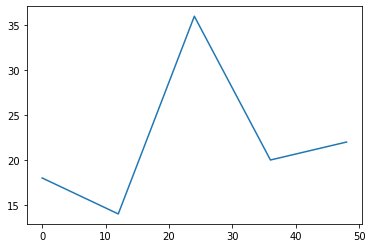

In [15]:
plt.plot(list(ans.keys()), list(ans.values()))

## Referências

<hr />

- MACHADO, L. A. T.; SILVA DIAS, M. A. F.; MORALES, C.; FISCH, G.; VILA, D.; ALBRECHT, R. I.; GOODMAN, S. J.; CALHEIROS, A. J. P.; BISCARO, T.; KUMMEROW, C.; COHEN, J.; FITZJARRALD, D.; NASCIMENTO, E. L.; SAKAMOTO, M. S.; CUNNINGHAM, C.; CHABOUREAU, J.-P.; PETERSEN, W. a.; ADAMS, D. K.; BALDINI, L.; ANGELIS, C. F.; SAPUCCI, L. F.; SALIO, P.; BARBOSA, H. M. J.; LANDULFO, E.; SOUZA, R. a. F.; BLAKESLEE, R. J.; BAILEY, J.; FREITAS, S.; LIMA, W. F. a.; TOKAY, A. The Chuva Project: How Does Convection Vary across Brazil? Bulletin of the American Meteorological Society, v. 95, n. 9, p. 1365–1380, set. 2014.


- MARTIN, S. T.; ARTAXO, P.; MACHADO, L. A. T.; MANZI, A. O.; SOUZA, R. A. F.; SCHUMACHER, C.; WANG, J.; ANDREAE, M. O.; BARBOSA, H. M. J.; FAN, J.; FISCH, G.; GOLDSTEIN, A. H.; GUENTHER, A.; JIMENEZ, J. L.; PÖSCHL, U.; SILVA DIAS, M. A.; 98 SMITH, J. N.; WENDISCH, M. Introduction: Observations and Modeling of the Green Ocean Amazon (GoAmazon2014/5). Atmospheric Chemistry and Physics, v. 16, n. 8, p. 4785–4797, abr. 2016.